<a href="https://colab.research.google.com/github/empyreanlee/Classification_ML/blob/main/magic_gamma_telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [67]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [68]:
df["class"] = (df["class"] == "g").astype(int)

In [69]:
df.head

<bound method NDFrame.head of         fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1    

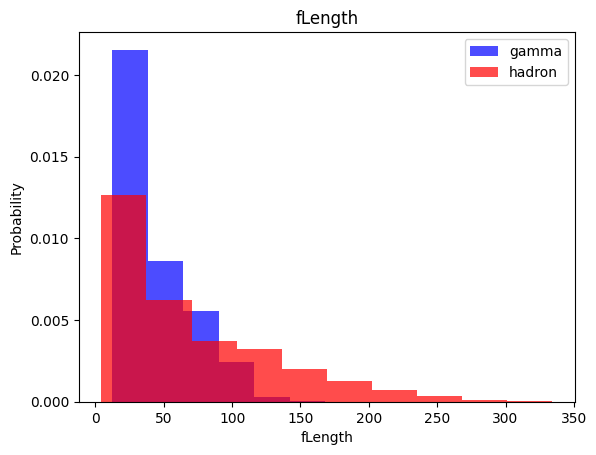

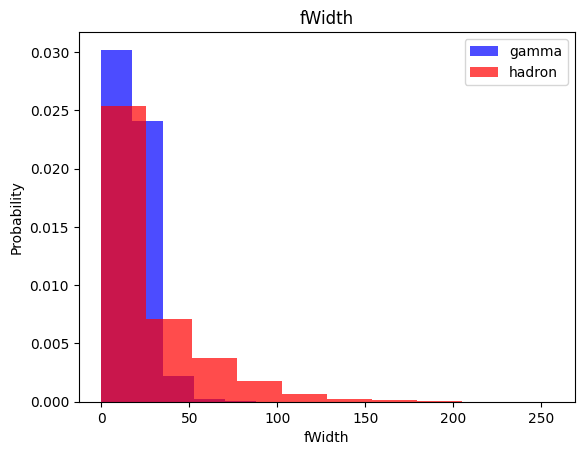

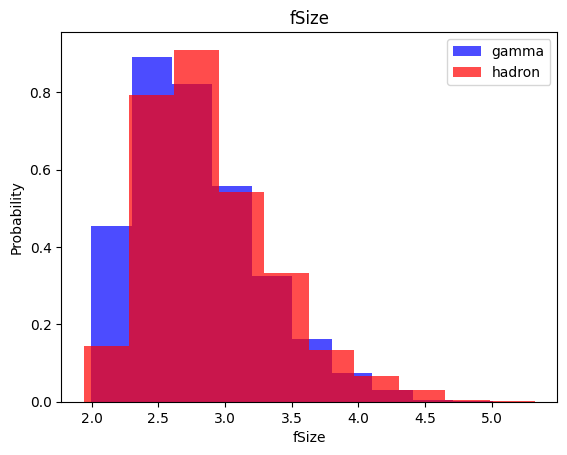

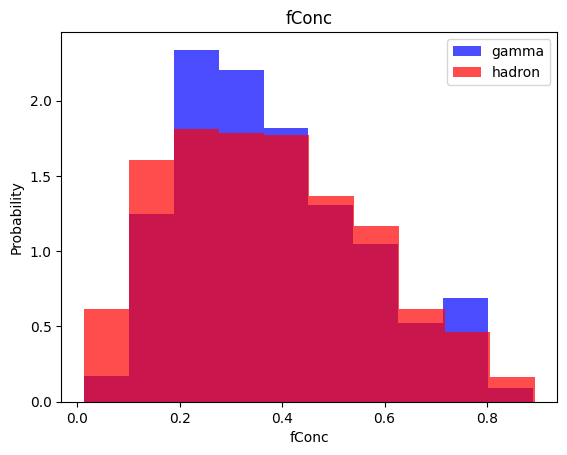

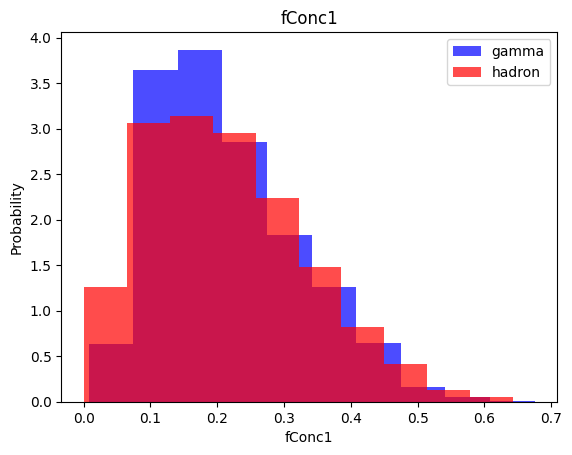

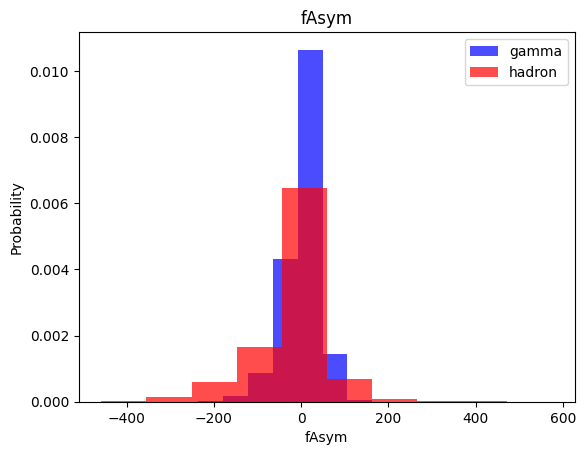

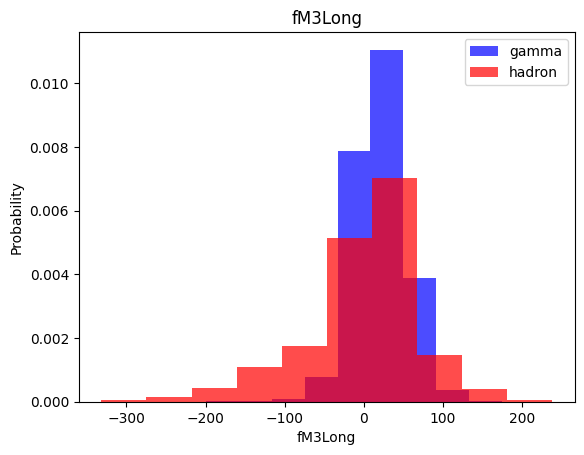

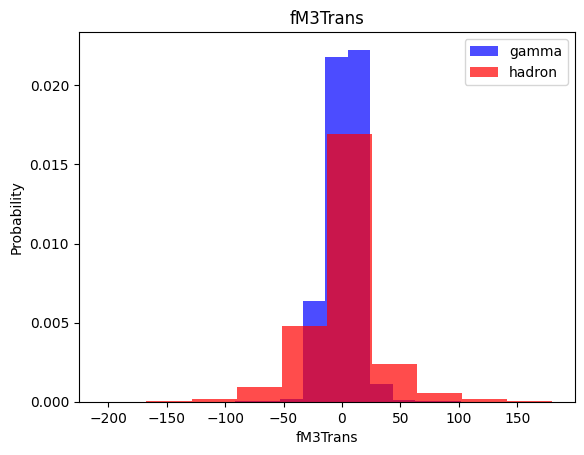

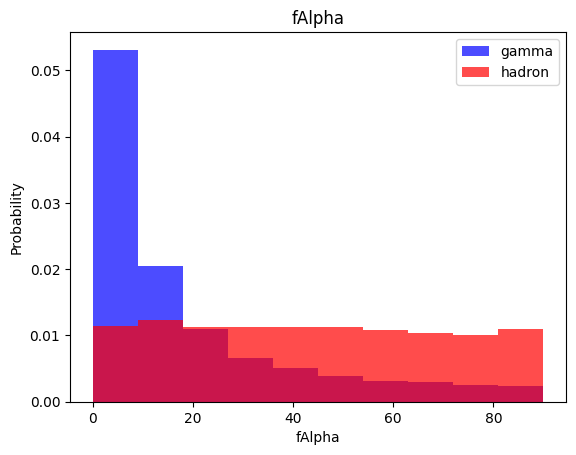

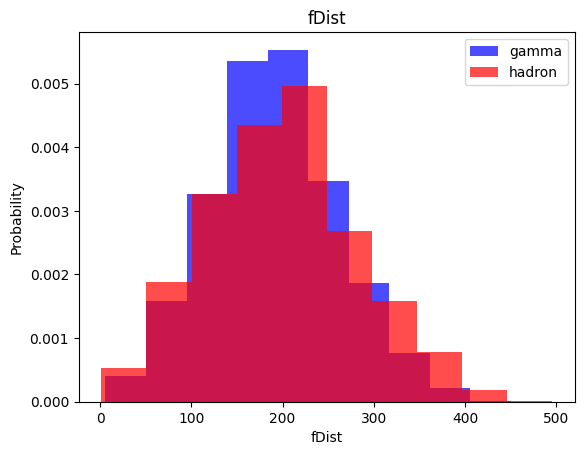

In [70]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [71]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [72]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [73]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

kNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [75]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
y_pred = knn_model.predict(X_test)


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1386
           1       0.84      0.85      0.85      2418

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [80]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.38      0.49      1386
           1       0.72      0.91      0.80      2418

    accuracy                           0.72      3804
   macro avg       0.71      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



Log Reg


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [83]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1386
           1       0.83      0.83      0.83      2418

    accuracy                           0.78      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.78      0.78      0.78      3804



SVM

In [84]:
from sklearn.svm import SVC

In [85]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [86]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1386
           1       0.88      0.92      0.90      2418

    accuracy                           0.86      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Net

In [87]:
import tensorflow as tf


In [88]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [89]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


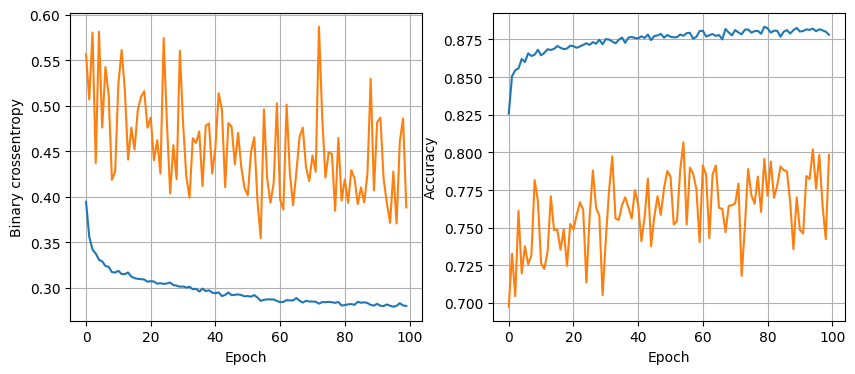

119/119 [==============================] - 0s 954us/step - loss: 0.3177 - accuracy: 0.8743
16 nodes, dropout 0, lr 0.01, batch size 64


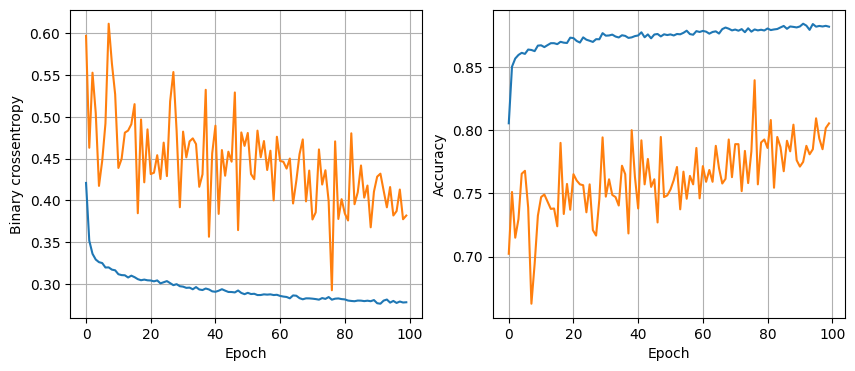

119/119 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8720
16 nodes, dropout 0, lr 0.01, batch size 128


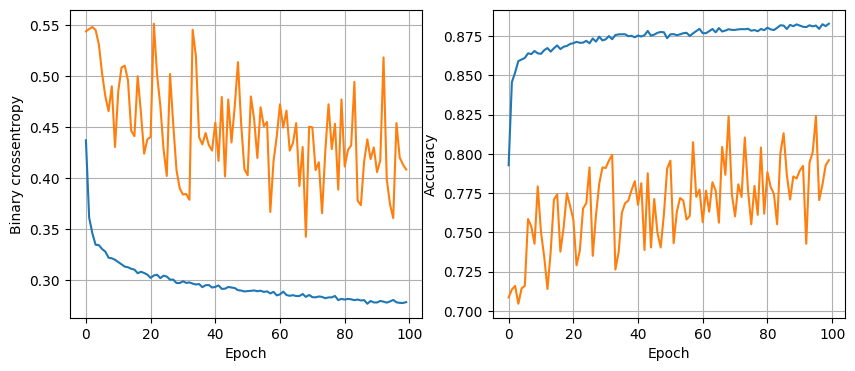

119/119 [==============================] - 0s 1ms/step - loss: 0.2943 - accuracy: 0.8764
16 nodes, dropout 0, lr 0.005, batch size 32


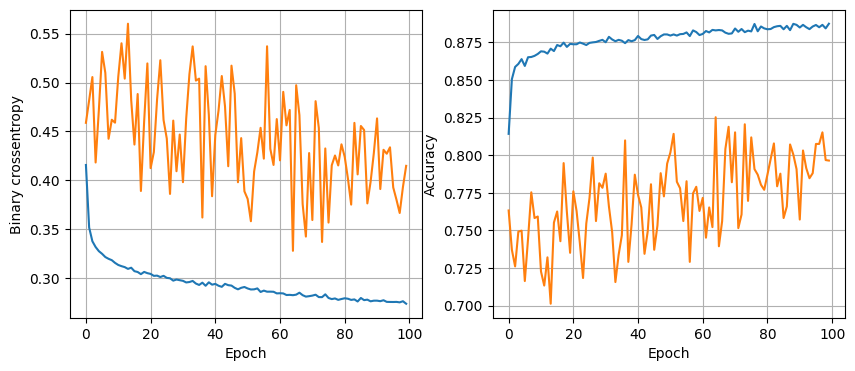

119/119 [==============================] - 0s 987us/step - loss: 0.3105 - accuracy: 0.8785
16 nodes, dropout 0, lr 0.005, batch size 64


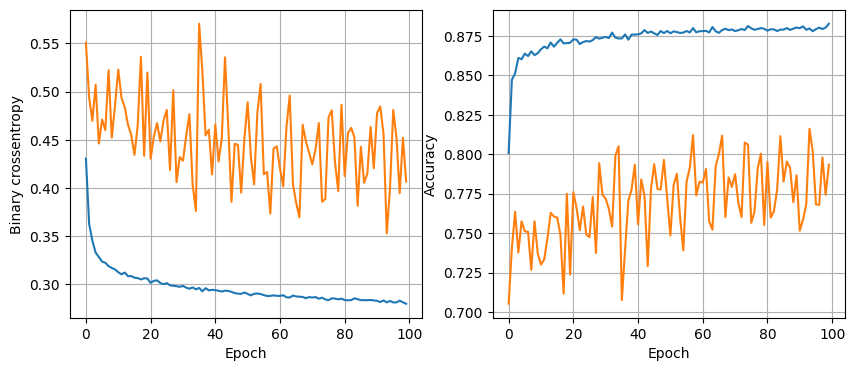

119/119 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8746
16 nodes, dropout 0, lr 0.005, batch size 128


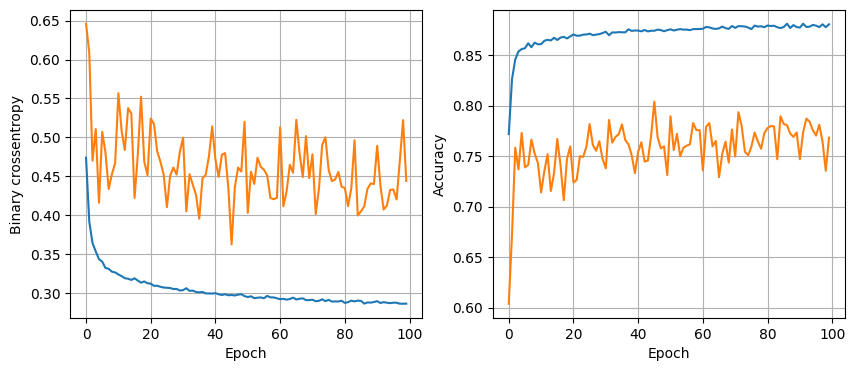

119/119 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.8672
16 nodes, dropout 0, lr 0.001, batch size 32


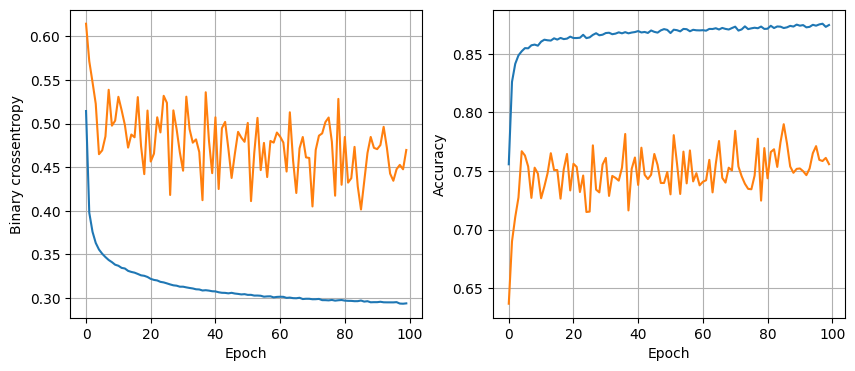

119/119 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.8759
16 nodes, dropout 0, lr 0.001, batch size 64


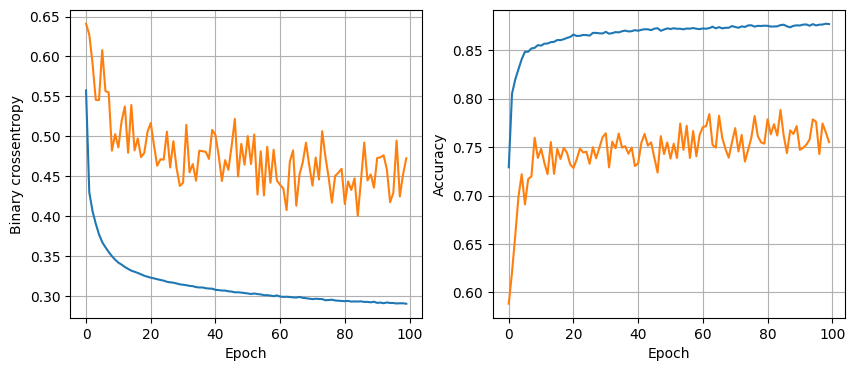

119/119 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.8720
16 nodes, dropout 0, lr 0.001, batch size 128


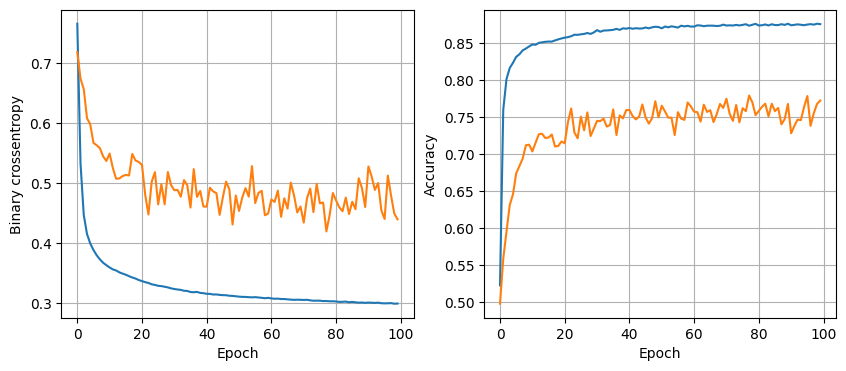

119/119 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8741
16 nodes, dropout 0.2, lr 0.01, batch size 32


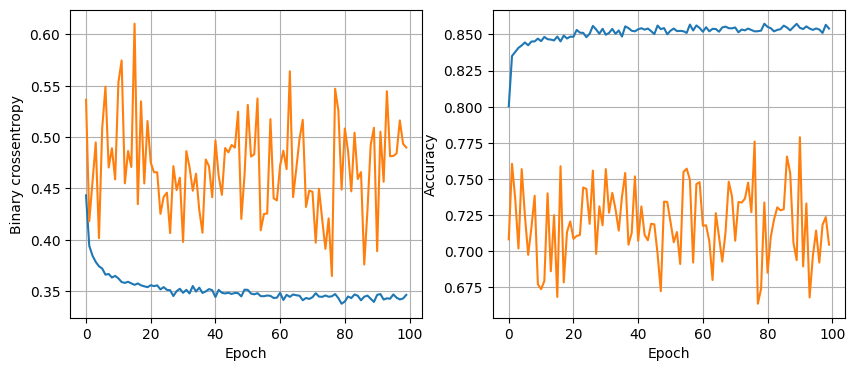

119/119 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.01, batch size 64


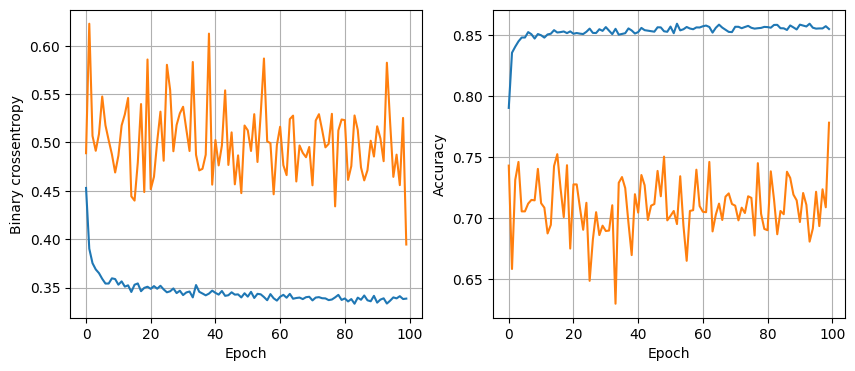

119/119 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8691
16 nodes, dropout 0.2, lr 0.01, batch size 128


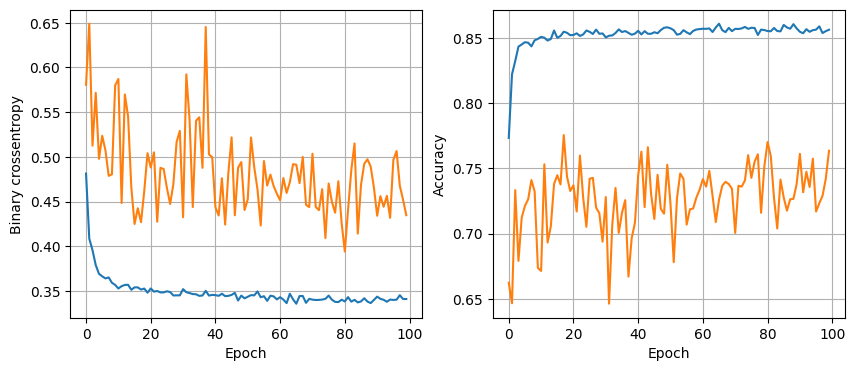

119/119 [==============================] - 0s 1ms/step - loss: 0.3074 - accuracy: 0.8704
16 nodes, dropout 0.2, lr 0.005, batch size 32


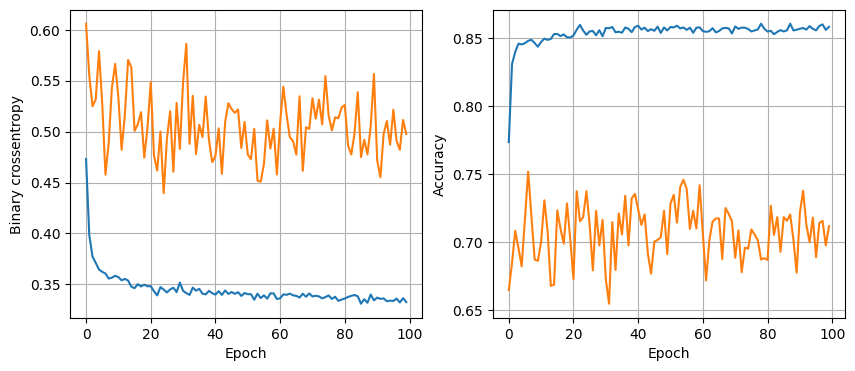

119/119 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 0.8672
16 nodes, dropout 0.2, lr 0.005, batch size 64


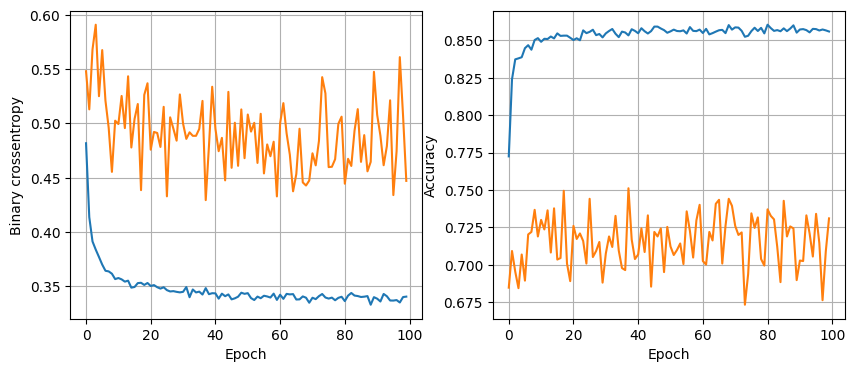

119/119 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.005, batch size 128


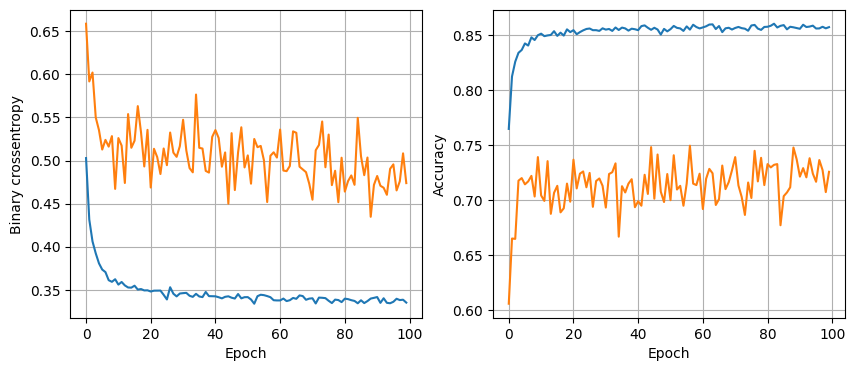

119/119 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.001, batch size 32


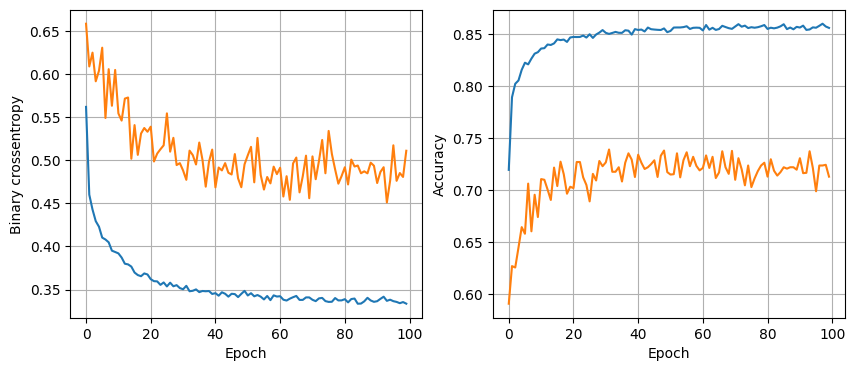

119/119 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.001, batch size 64


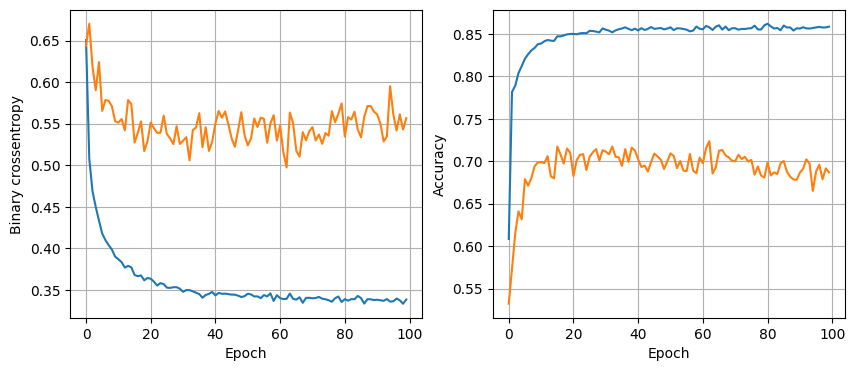

119/119 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.8641
16 nodes, dropout 0.2, lr 0.001, batch size 128


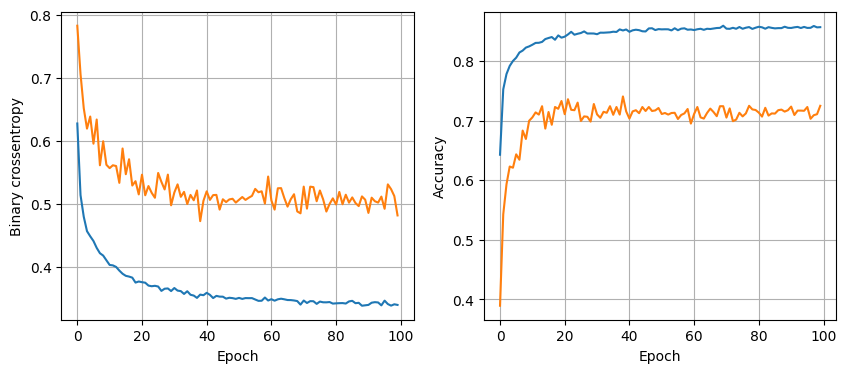

119/119 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.8709
32 nodes, dropout 0, lr 0.01, batch size 32


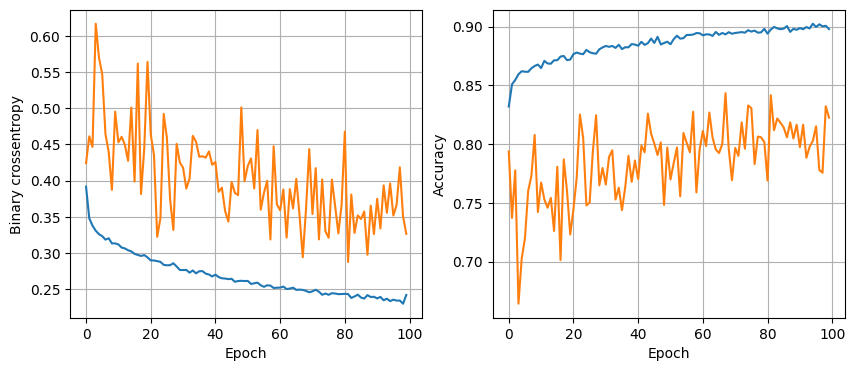

119/119 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8691
32 nodes, dropout 0, lr 0.01, batch size 64


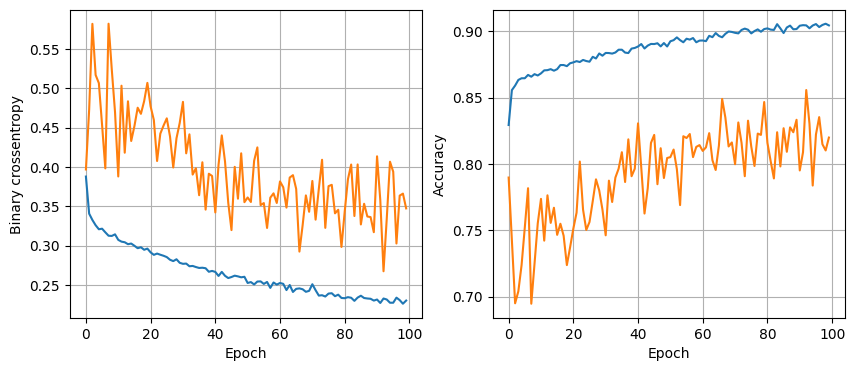

119/119 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8675
32 nodes, dropout 0, lr 0.01, batch size 128


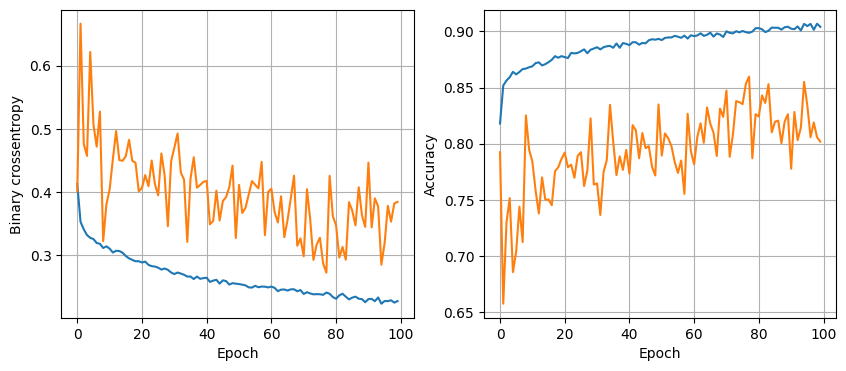

119/119 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8670
32 nodes, dropout 0, lr 0.005, batch size 32


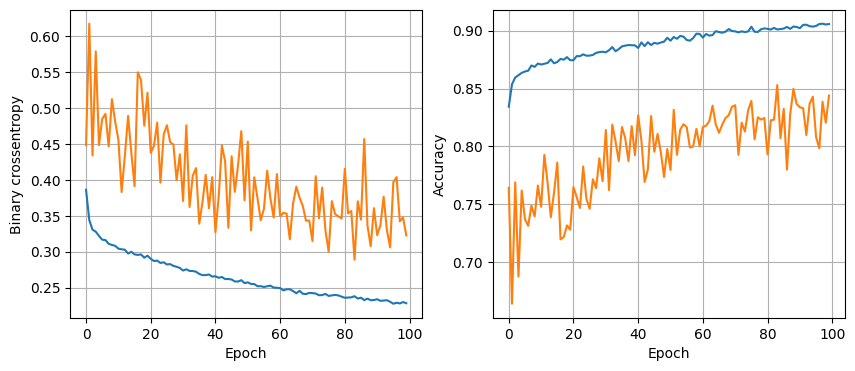

119/119 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8654
32 nodes, dropout 0, lr 0.005, batch size 64


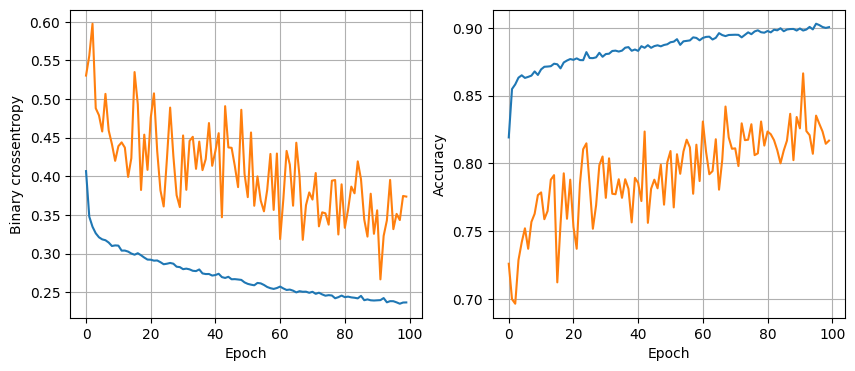

119/119 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8704
32 nodes, dropout 0, lr 0.005, batch size 128


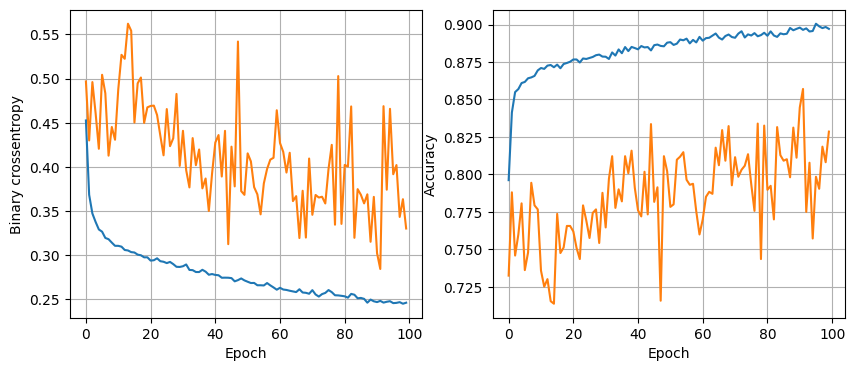

119/119 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8620
32 nodes, dropout 0, lr 0.001, batch size 32


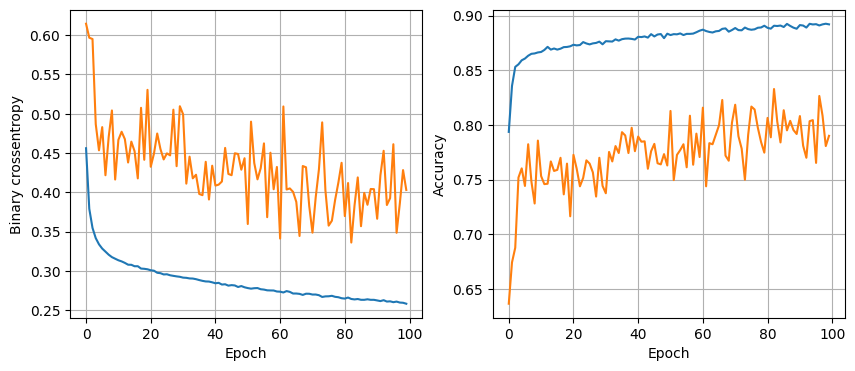

119/119 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8709
32 nodes, dropout 0, lr 0.001, batch size 64


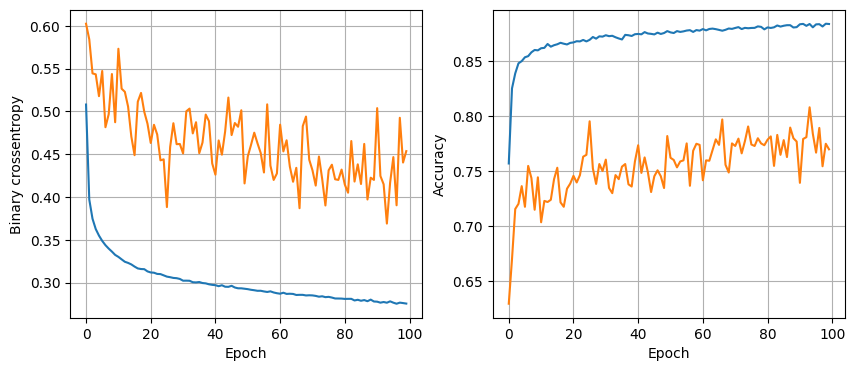

119/119 [==============================] - 0s 1ms/step - loss: 0.3098 - accuracy: 0.8728
32 nodes, dropout 0, lr 0.001, batch size 128


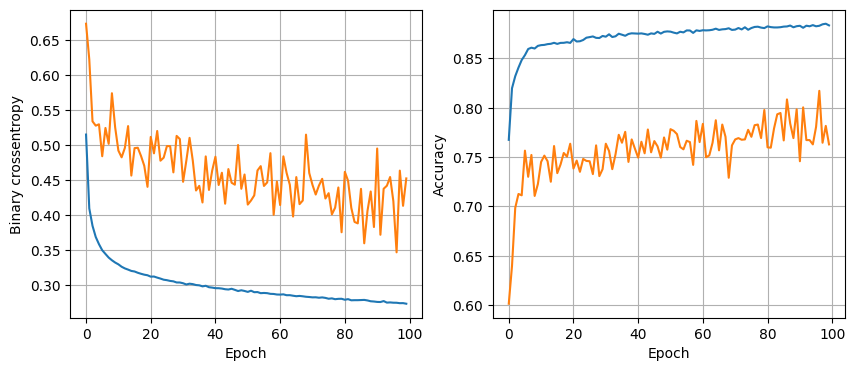

119/119 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.8733
32 nodes, dropout 0.2, lr 0.01, batch size 32


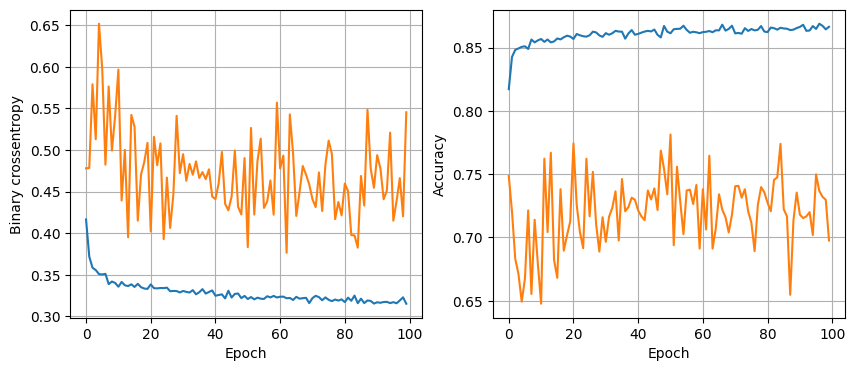

119/119 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.01, batch size 64


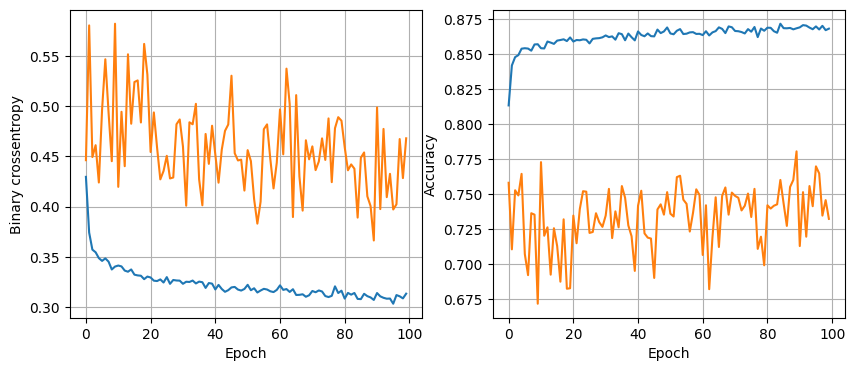

119/119 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8746
32 nodes, dropout 0.2, lr 0.01, batch size 128


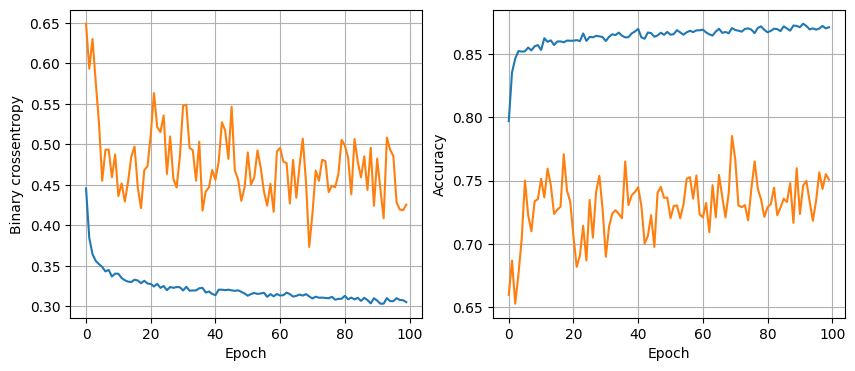

119/119 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8772
32 nodes, dropout 0.2, lr 0.005, batch size 32


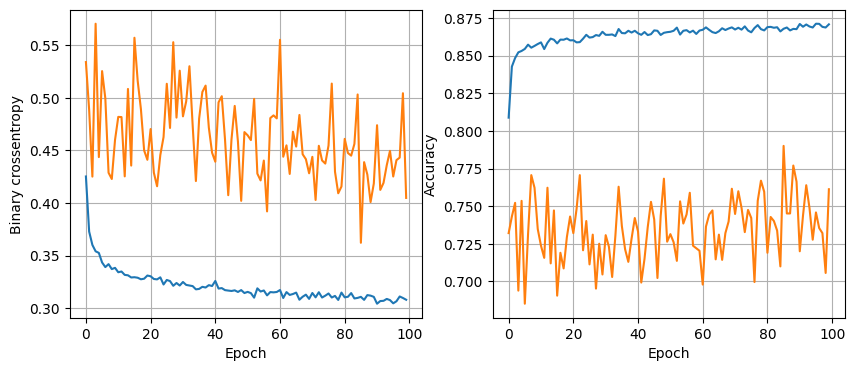

119/119 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8772
32 nodes, dropout 0.2, lr 0.005, batch size 64


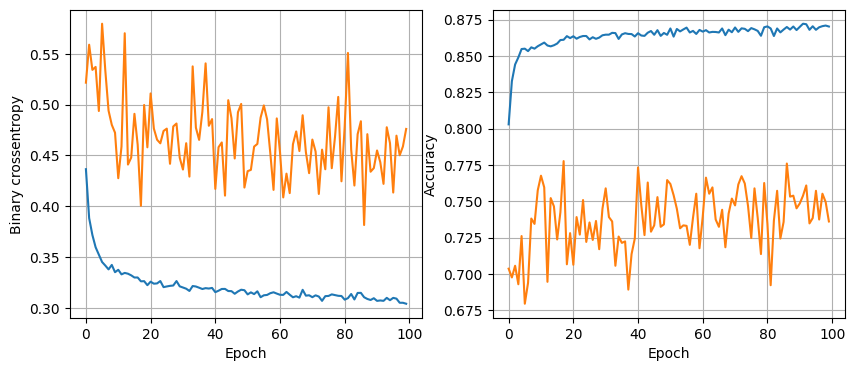

119/119 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.8775
32 nodes, dropout 0.2, lr 0.005, batch size 128


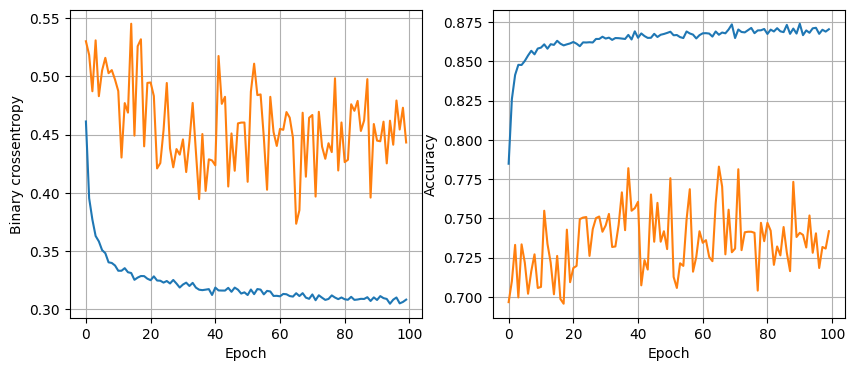

119/119 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.001, batch size 32


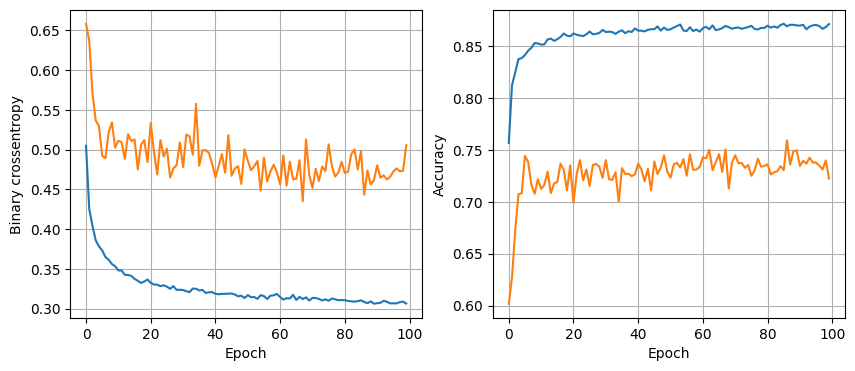

119/119 [==============================] - 0s 1ms/step - loss: 0.3008 - accuracy: 0.8704
32 nodes, dropout 0.2, lr 0.001, batch size 64


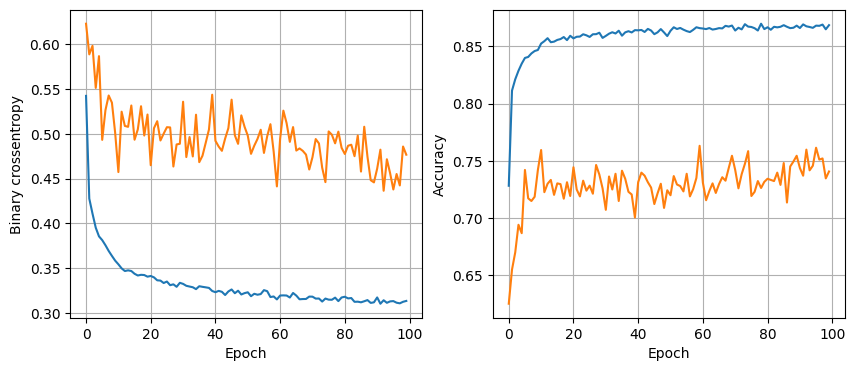

119/119 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.8767
32 nodes, dropout 0.2, lr 0.001, batch size 128


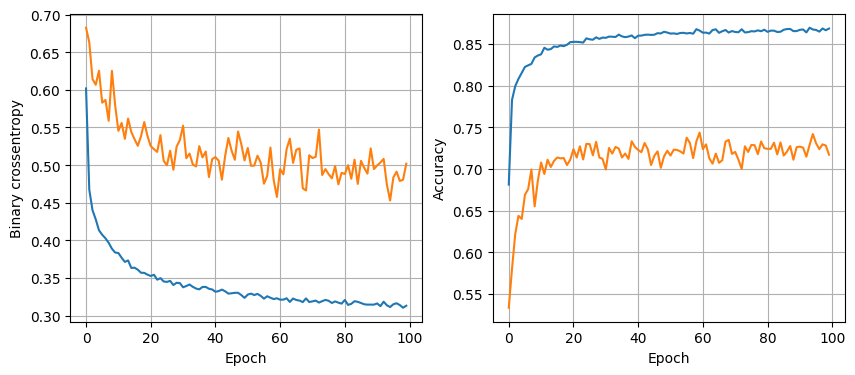

119/119 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8738
64 nodes, dropout 0, lr 0.01, batch size 32


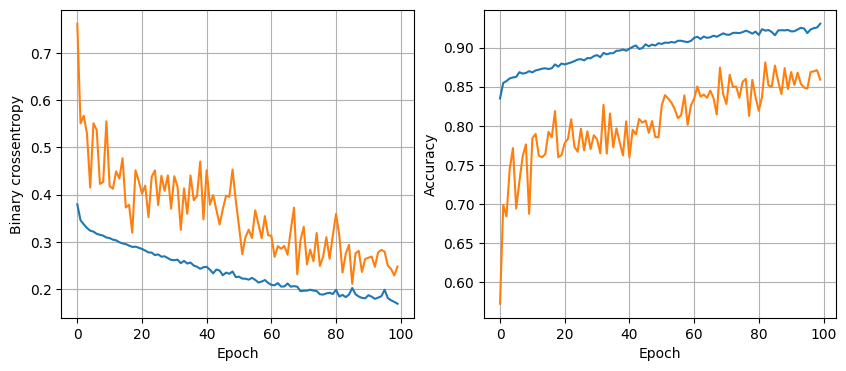

119/119 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.8552
64 nodes, dropout 0, lr 0.01, batch size 64


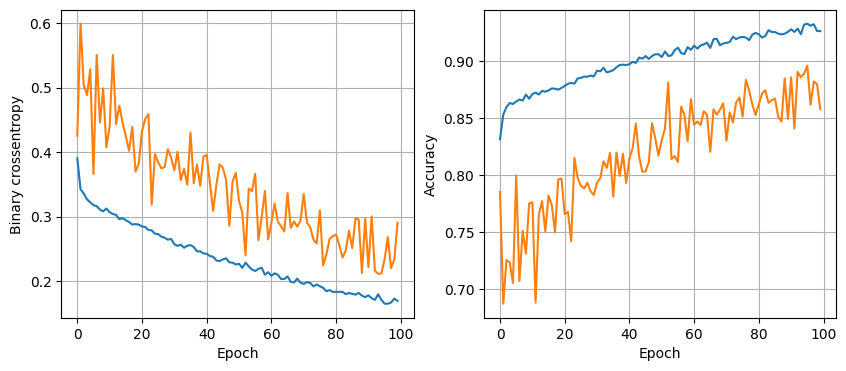

119/119 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.8738
64 nodes, dropout 0, lr 0.01, batch size 128


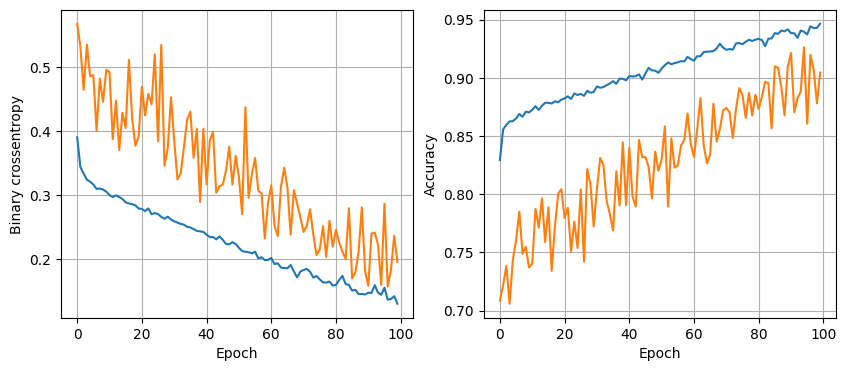

119/119 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.8530
64 nodes, dropout 0, lr 0.005, batch size 32


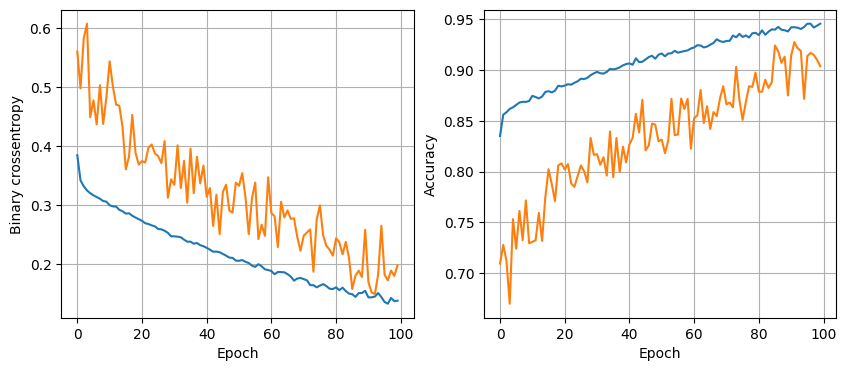

119/119 [==============================] - 0s 1ms/step - loss: 0.5646 - accuracy: 0.8638
64 nodes, dropout 0, lr 0.005, batch size 64


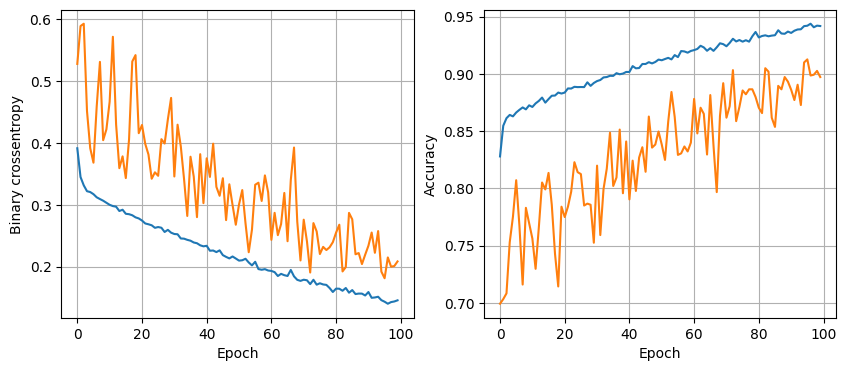

119/119 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.8638
64 nodes, dropout 0, lr 0.005, batch size 128


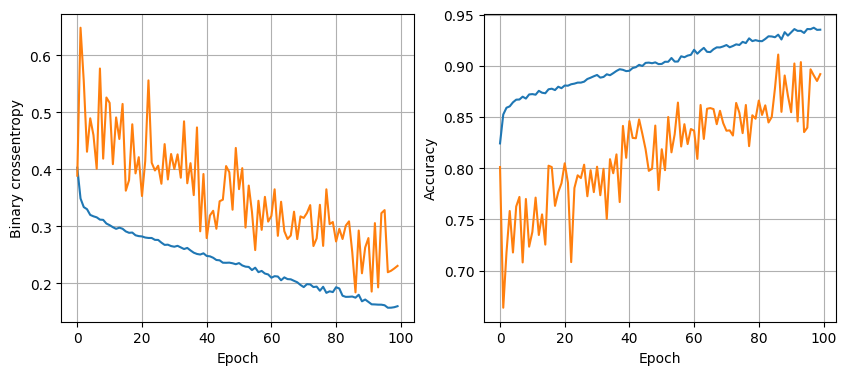

119/119 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8670
64 nodes, dropout 0, lr 0.001, batch size 32


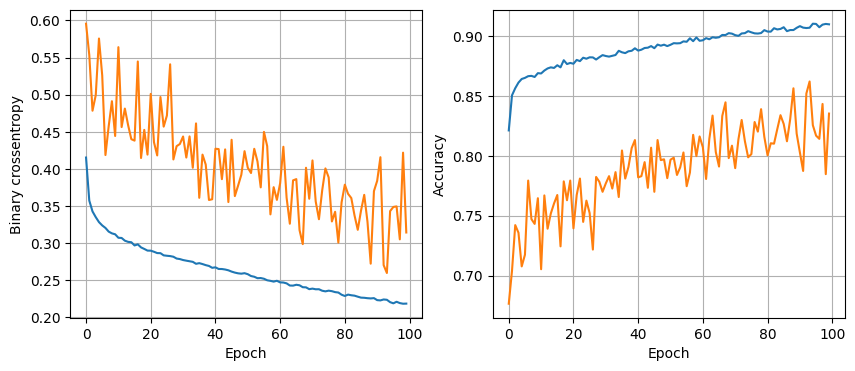

119/119 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8662
64 nodes, dropout 0, lr 0.001, batch size 64


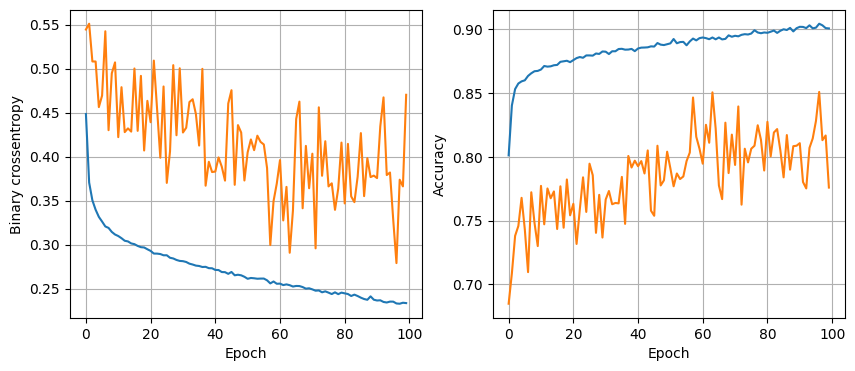

119/119 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8712
64 nodes, dropout 0, lr 0.001, batch size 128


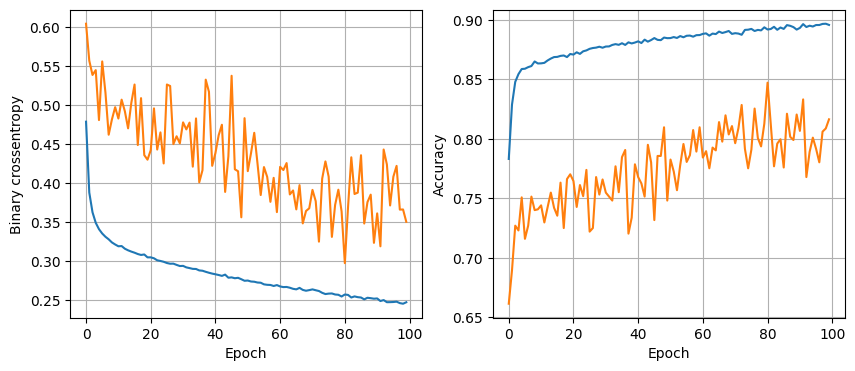

119/119 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8791
64 nodes, dropout 0.2, lr 0.01, batch size 32


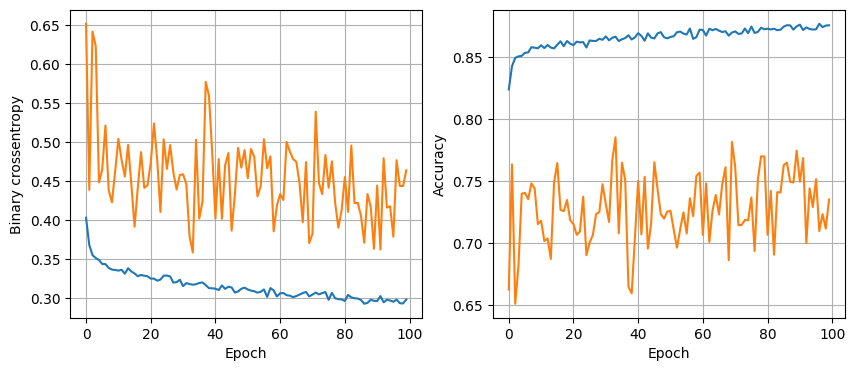

119/119 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.8780
64 nodes, dropout 0.2, lr 0.01, batch size 64


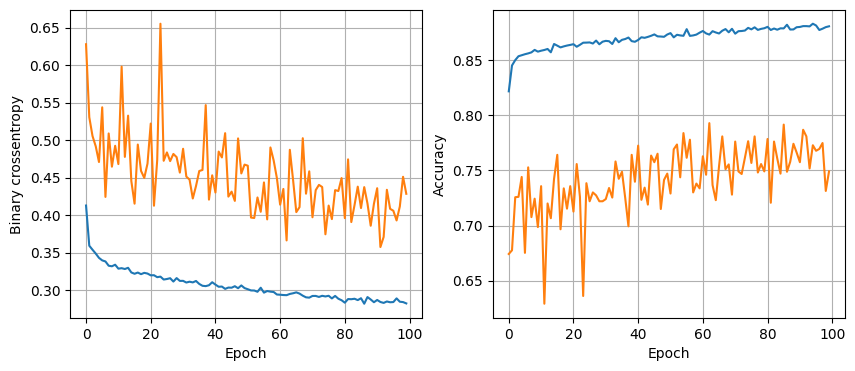

119/119 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.01, batch size 128


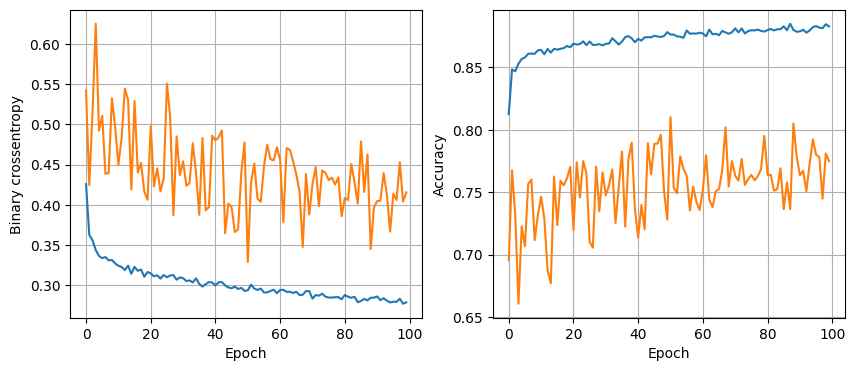

119/119 [==============================] - 0s 1ms/step - loss: 0.2902 - accuracy: 0.8788
64 nodes, dropout 0.2, lr 0.005, batch size 32


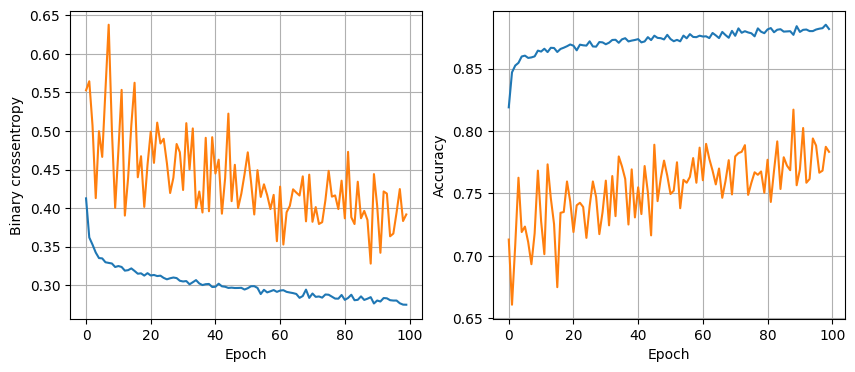

119/119 [==============================] - 0s 1ms/step - loss: 0.2969 - accuracy: 0.8807
64 nodes, dropout 0.2, lr 0.005, batch size 64


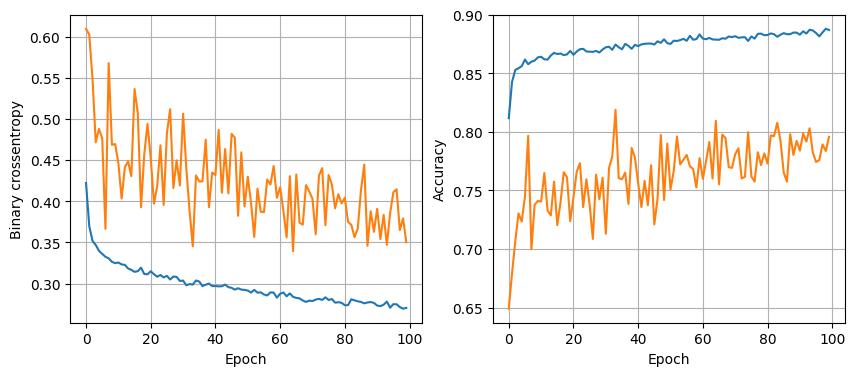

119/119 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.8804
64 nodes, dropout 0.2, lr 0.005, batch size 128


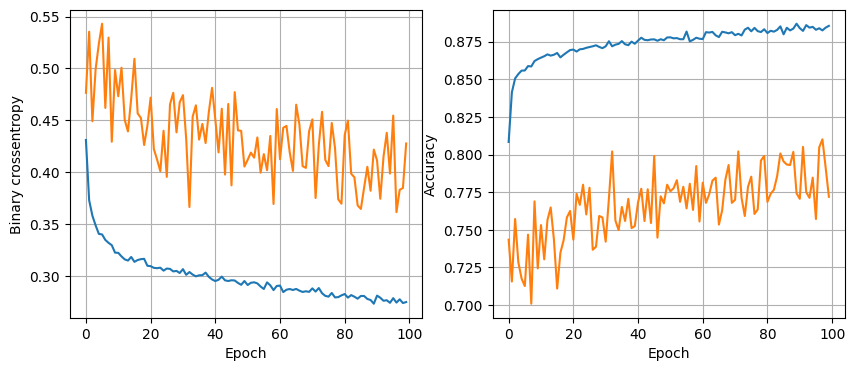

119/119 [==============================] - 0s 1ms/step - loss: 0.2944 - accuracy: 0.8820
64 nodes, dropout 0.2, lr 0.001, batch size 32


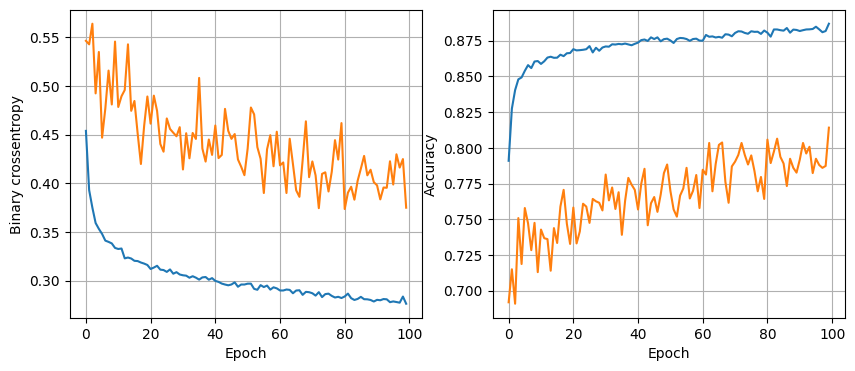

119/119 [==============================] - 0s 1ms/step - loss: 0.2890 - accuracy: 0.8828
64 nodes, dropout 0.2, lr 0.001, batch size 64


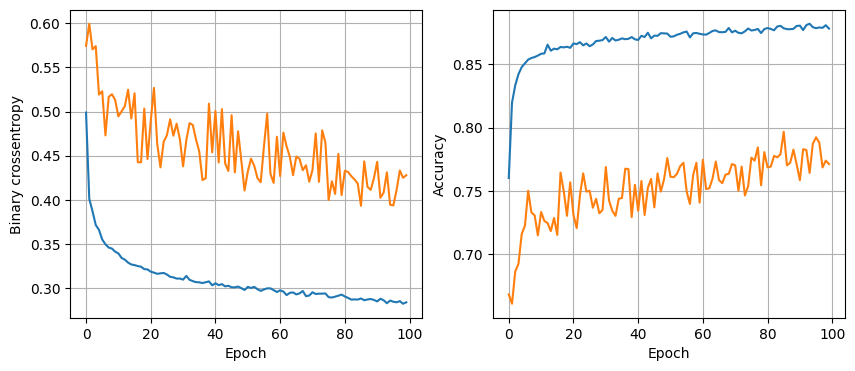

119/119 [==============================] - 0s 1ms/step - loss: 0.2925 - accuracy: 0.8814
64 nodes, dropout 0.2, lr 0.001, batch size 128


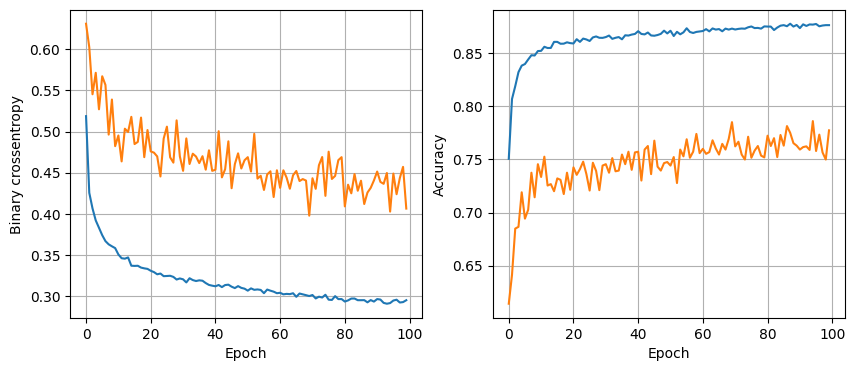

119/119 [==============================] - 0s 1ms/step - loss: 0.2916 - accuracy: 0.8780


In [90]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [96]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 830us/step


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1386
           1       0.87      0.95      0.91      2418

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

